## Observations and Insights 

Hello

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merge_inner = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merge_inner.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Checking the number of mice.
print(f"Before cleaning, there were {len(merge_inner['Mouse ID'].unique())} unique mice.")

Before cleaning, there were 249 unique mice.


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_inner.duplicated(subset = ['Mouse ID', 'Timepoint'])
duplicates.value_counts()

# Create list to contain duplicate ids and loop through IDs to pull duplicates out
duplicate_ids = []
for i in range(len(duplicates)):
    if (duplicates[i]) and not (merge_inner['Mouse ID'][i] in duplicate_ids):
        duplicate_ids.append(merge_inner['Mouse ID'][i])
print(duplicate_ids)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_inner.loc[merge_inner['Mouse ID'] == 'g989', :]
duplicate_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_indices = merge_inner[merge_inner['Mouse ID'] == 'g989'].index
clean_mouse_df = merge_inner.drop(drop_indices, inplace = False)

In [11]:
# Checking the number of mice in the clean DataFrame.
print(f"After cleaning, there are now {len(clean_mouse_df['Mouse ID'].unique())} unique mice.")


After cleaning, there are now 248 unique mice.


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Create groupby object
regimen_groupby = clean_mouse_df.groupby(by = "Drug Regimen")

# Calculate mean, median, variance, SD, and SEM
tumor_means = regimen_groupby['Tumor Volume (mm3)'].mean()
tumor_medians = regimen_groupby['Tumor Volume (mm3)'].median()
tumor_var = regimen_groupby['Tumor Volume (mm3)'].var()
tumor_sd = regimen_groupby['Tumor Volume (mm3)'].std()
tumor_sem = regimen_groupby['Tumor Volume (mm3)'].sem()

# Create summary table
summary_table1 = pd.DataFrame({'Tumor_Mean' : tumor_means,
                               'Tumor_Median' : tumor_medians,
                               'Tumor Variance' : tumor_var, 
                               'Tumor_Std' : tumor_sd, 
                               'Tumor_SEM' : tumor_sem})

summary_table1.head()


,Tumor_Mean,Tumor_Median,Tumor Variance,Tumor_Std,Tumor_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_table2 = clean_mouse_df.groupby(by = "Drug Regimen").agg({'Tumor Volume (mm3)' : ["mean", "median", "var", "std", "sem"]})
summary_table2.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

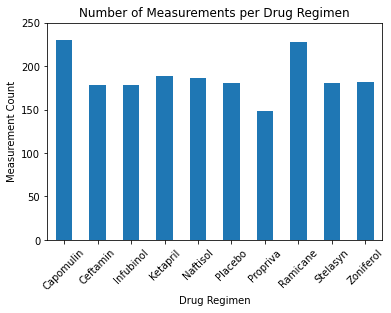

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_groupby.count().plot(kind = 'bar', 
                             y = 'Tumor Volume (mm3)', 
                             xlabel = 'Drug Regimen',
                             ylabel = 'Measurement Count',
                             title = 'Number of Measurements per Drug Regimen',
                             legend = False,
                             xlim = (-0.5, 9.5),
                             ylim = (0, 250),
                             rot = 45)


plt.show()



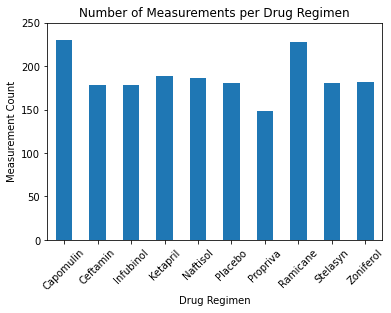

In [52]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Store the names of the drug regimens in a list
regimen_names = regimen_groupby['Tumor Volume (mm3)'].count().index

# Create bar plot with matplotlib
plt.bar(regimen_names , regimen_groupby['Tumor Volume (mm3)'].count(), width = 0.5)
plt.title('Number of Measurements per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Measurement Count')
plt.xticks(rotation = 45)
plt.xlim(-0.5, len(regimen_names) -0.5)
plt.ylim(0, 250)
plt.show()

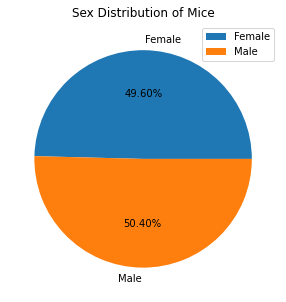

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get new data frame with unique mouse id and groupby sex
unique_ids_df = clean_mouse_df.drop_duplicates(subset = 'Mouse ID')
sex_groupby = unique_ids_df.groupby('Sex')
sex_groupby.count()

# Create pie plot
sex_groupby.count().plot.pie(y = 'Mouse ID',
                             title = 'Sex Distribution of Mice',
                             ylabel = "",
                             figsize = (5,5),
                             autopct='%1.2f%%')
plt.show()


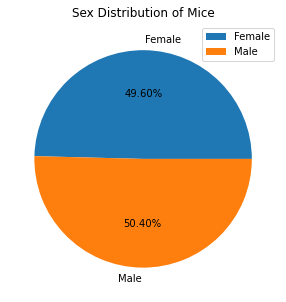

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create sex labels and list with sex count

sex_labels = ['Female', 'Male']
sex_count = [unique_ids_df['Sex'].value_counts()[1],unique_ids_df['Sex'].value_counts()[0]]

# Plot pie graph with pyplot
plt.figure(figsize = (5,5))
plt.pie(sex_count, labels = sex_labels, autopct = '%1.2f%%')
plt.title('Sex Distribution of Mice')
plt.legend(loc = 'best')
plt.show()


## Quartiles, Outliers and Boxplots

In [114]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get subset of dataframe with only Capomulin, Ramicane, Infubinol, and Ceftamin
top_four_df = clean_mouse_df.loc[(clean_mouse_df['Drug Regimen'] == 'Capomulin') |
                                 (clean_mouse_df['Drug Regimen'] == 'Ramicane') |
                                 (clean_mouse_df['Drug Regimen'] == 'Infubinol') |
                                 (clean_mouse_df['Drug Regimen'] == 'Ceftamin'), :]
top_four_df.head()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = top_four_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(last_timepoints, top_four_df, on = ['Mouse ID', 'Timepoint'])
final_tumor_vol_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [160]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_vol_df['Drug Regimen'].unique()
print(treatments)

# Initialize empty lists to hold tumor data for each regimen
final_inf = []
final_cef = []
final_ram = []
final_cap = []

# Use for loop to create lists of final tumor volumes for each of the four regimens
for i in range(len(final_tumor_vol_df['Tumor Volume (mm3)'])):
    if final_tumor_vol_df['Drug Regimen'][i] == 'Infubinol':
        final_inf.append(final_tumor_vol_df['Tumor Volume (mm3)'][i])
    elif final_tumor_vol_df['Drug Regimen'][i] == 'Ceftamin':
        final_cef.append(final_tumor_vol_df['Tumor Volume (mm3)'][i])
    elif final_tumor_vol_df['Drug Regimen'][i] == 'Ramicane':
        final_ram.append(final_tumor_vol_df['Tumor Volume (mm3)'][i])
    elif final_tumor_vol_df['Drug Regimen'][i] == 'Capomulin':
        final_cap.append(final_tumor_vol_df['Tumor Volume (mm3)'][i])
        
# Type cast lists to panda series        
final_inf = pd.Series(final_inf)
final_cef = pd.Series(final_cef)
final_ram = pd.Series(final_ram)
final_cap = pd.Series(final_cap)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create function to calculate IQR and check for outliers
def outlier_check(data, regimen):
    
    # create quartiles and iqr
    quartiles = data.quantile([0.25,0.5,0.75])
    firstq = quartiles[0.25]
    thirdq = quartiles[0.75]
    iqr = thirdq-firstq

    # print calculated information
    print(f"For the drug regimen {regimen}:")
    print(f"The median is: {quartiles[0.5]} ")
    print(f"The lower quartile is: {firstq}")
    print(f"The upper quartile is: {thirdq}")
    print(f"The interquartile range is: {iqr}")
    
    # Calculate lower and upper bounds for outliers
    lower_bound = firstq - (1.5*iqr)
    upper_bound = thirdq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # For loop to check for outliers and place outliers in a list
    outliers = []
    for obs in data:
        if (obs > upper_bound) | (obs < lower_bound):
            outliers.append(obs)
    # Print the outliers if applicable
    if len(outliers) > 0:
        print(f"The following are outliers: {outliers}")
    else:
        print(f"No outliers found.")
    print('\n')
       

['Infubinol' 'Ceftamin' 'Ramicane' 'Capomulin']


In [161]:
# IQR and outlier check


# for Infubinol
outlier_check(final_inf, 'Infubinol')

# for Ceftamin
outlier_check(final_cef, 'Ceftamin')

# for Ramicane
outlier_check(final_ram, 'Ramicane')

# for Capomulin
outlier_check(final_cap, 'Capomulin')

For the drug regimen Infubinol:
The median is: 60.16518046 
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The following are outliers: [36.321345799999996]


For the drug regimen Ceftamin:
The median is: 59.85195552 
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
No outliers found.


For the drug regimen Ramicane:
The median is: 36.56165229 
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No outliers found.


For the drug regimen Capomulin:
The median is: 38.125164399999996 
The lower quarti

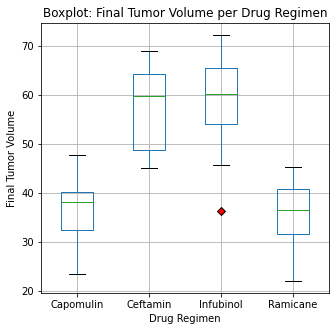

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create dictionary with style format for outliers
outlier_format = dict(markerfacecolor = 'r', marker = 'D')

# Create plot
tumor_boxplot = final_tumor_vol_df.boxplot(column = 'Tumor Volume (mm3)', 
                           by = 'Drug Regimen', 
                           flierprops = outlier_format,
                           figsize = (5,5))

# Get rid of autogenerated titles
plt.suptitle('')
tumor_boxplot.get_figure().gca().set_title("")

# Add labels and title
plt.ylabel('Final Tumor Volume')
plt.title('Boxplot: Final Tumor Volume per Drug Regimen')

# Display plot
plt.show()

## Line and Scatter Plots

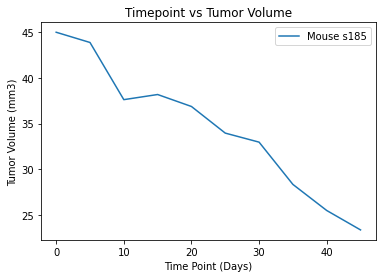

In [173]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Take subset of original data frame
capo_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin', :]
capo_df.head(10)

# Grab data for Mouse ID s185 
timepoints_s185 = capo_df.loc[capo_df["Mouse ID"] == "s185", "Timepoint"]
tumor_vol_s185 = capo_df.loc[capo_df["Mouse ID"] == "s185", "Tumor Volume (mm3)"]


# Create line plot

plt.plot(timepoints_s185, tumor_vol_s185, label = 'Mouse s185')
plt.title("Timepoint vs Tumor Volume")
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc = 'best')
plt.show()

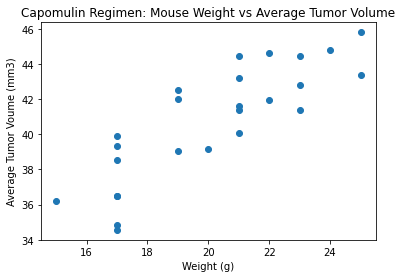

In [174]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Extract average tumor volue and weight for each mouse in the Capomulin tests
capo_groupby = capo_df.groupby("Mouse ID")
avg_tumor_vols = capo_groupby.mean()["Tumor Volume (mm3)"]
mouse_weights = capo_groupby.mean()["Weight (g)"]

# Plot scatter plot
plt.scatter(mouse_weights, avg_tumor_vols)
plt.title("Capomulin Regimen: Mouse Weight vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Voume (mm3)")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
